## 1. Import libraries

* Import Numpy and pandas for data manipulation
* Import **sklearn** ensemble algorithms: *Bagging classifier* and *Random Forest classifier*
* Import **sklearn** accuracy metric and StandardScaler (scales between 0 and 1)
* Import chart utilities (matplotlib and seaborn)



In [1]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## 2. Import the Test and Train Dataset

In [2]:
test = pd.read_csv("test.csv")
train =  pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# See info about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# See Description of Dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.1. Concatenate the train and test data

In [6]:
df_len = len(train)
df_all = pd.concat([train, test], sort=False, ignore_index=True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 3. Feature engineering

First, we'll impute some missing data

In [7]:
# Filling the missing value in Embarkerd with the mode
df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0]) 

# Filling the missing value in Cabin with 'U'
df_all['Cabin'] = df_all['Cabin'].fillna('U')

# Filling the missing value in Ticket with 'Unknown'
df_all['Ticket'] = df_all['Ticket'].fillna('Unknown') 

# # Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]) 

#Age is filled with the median of ages by Sex and by Pclass
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Merge the cabins in three classes. 

In [8]:
df_all['Cabin'] = df_all['Cabin'].apply(lambda x: x[0])

idx = df_all[df_all['Cabin'] == 'T'].index
df_all.loc[idx, 'Cabin'] = 'A'

df_all['Cabin'] = df_all['Cabin'].replace(['A', 'B', 'C'], 'ABC')
df_all['Cabin'] = df_all['Cabin'].replace(['D', 'E'], 'DE')
df_all['Cabin'] = df_all['Cabin'].replace(['F', 'G'], 'FG')

Extract the title from the name, and the surnames

In [9]:
names = df_all['Name'].str.split(',')
names = names.apply(lambda x: x[1]).str.split(" ")
names = names.apply(lambda x: x[1])
df_all['Title'] = names

df_all["Title"] = df_all["Title"].replace(to_replace=["Major." ,"Col.","Capt.","the","Don.",
                                                      "Jonkheer.","Lady.","Sir.", "Dona.",
                                                     "Rev.", "Dr."], value="Noble") 
df_all["Title"] = df_all["Title"].replace(to_replace=["Mlle.","Ms."],value="Miss.") 
df_all["Title"] = df_all["Title"].replace(to_replace=["Mme."], value="Mrs.") 

df_all["Title"].value_counts()

Mr.        757
Miss.      264
Mrs.       198
Master.     61
Noble       29
Name: Title, dtype: int64

In [10]:
surnames = df_all['Name'].str.split(',')
surnames = surnames.map(lambda x: x[0])
df_all['Surname'] = surnames

### Create new features

* Ticket_frequency for the count of each ticket
* Family that's the union of SibSp + Parch + 1 (the person itself)
* The Family is mapped by size (alone, small, medium and large)
* The FareBin maps the Fare into 4 intervals
* The AgeBin maps the Age into 5 intervals

In [11]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

df_all['Family'] = df_all['SibSp'] + df_all['Parch'] + 1

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family'] = df_all['Family'].map(family_map)

df_all['FareBin'] = pd.qcut(df_all['Fare'], 4)

df_all['AgeBin'] = pd.cut(df_all['Age'].astype(int), 5)

Drop the columns that will not be used.

Factorize the categorical data (**One hot encoding** for the Sex feature).

In [12]:
# Drop (SibSp, Parch, Fare, Age, Name, Ticket, PassengerId)
df_all = df_all.drop(['SibSp','Parch','Fare','Age','Name','Ticket','PassengerId'], axis=1)

# df_all["Sex"], _ = pd.factorize(df_all["Sex"], sort=True)
df_all["Embarked"], _ = pd.factorize(df_all["Embarked"], sort=True)
df_all["Title"], _ = pd.factorize(df_all["Title"], sort=True)
df_all["Cabin"], _ = pd.factorize(df_all["Cabin"], sort=True)
df_all["AgeBin"], _ = pd.factorize(df_all["AgeBin"], sort=True)
df_all["FareBin"], _ = pd.factorize(df_all["FareBin"], sort=True)
df_all["Family"], _ = pd.factorize(df_all["Family"], sort=True)
df_all["Surname"], _ = pd.factorize(df_all["Surname"], sort=True)

df_all = pd.get_dummies(df_all) #Sex
df_all.head()

,Survived,Pclass,Cabin,Embarked,Title,Surname,Ticket_Frequency,Family,FareBin,AgeBin,Sex_female,Sex_male
0,0.0,3,3,2,2,100,1,3,0,1,0,1
1,1.0,1,0,0,3,182,2,3,3,2,1,0
2,1.0,3,3,2,1,329,1,0,1,1,1,0
3,1.0,1,0,2,3,267,2,3,3,2,1,0
4,0.0,3,3,2,2,15,1,0,1,2,0,1


Separate train and test datasets

In [13]:
X = df_all[:df_len]
X_test = df_all[df_len:]

See the correlation between the variables

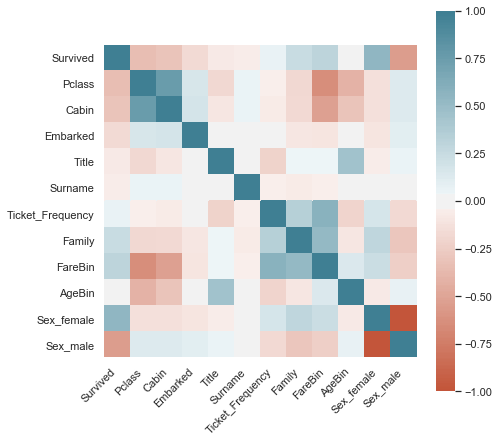

In [14]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Create Y and drop the *Survived* column.

In [15]:
Y = X['Survived']
X = X.drop('Survived', axis=1)
X_test = X_test.drop('Survived', axis=1)

## 4. Training the *Random Forest* Algorithm with the *Bagging Classifier*

Scale the data between -1 and 1.

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X_test = ss.transform(X_test)

Y = Y.values

Split into train and validation sets.

In [17]:
#Split the dataset in ratio of (70-30)

X_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

#print shape of datasets

print('X_train: {}, x_test {}, y_train {}, y_test {}'.format(X_train.shape, x_test.shape, y_train.shape, y_test.shape))

X_train: (623, 11), x_test (268, 11), y_train (623,), y_test (268,)


Training. The RandomForestClassified parameters was chosen using the GridSearchCV.

In [18]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
                       oob_score=True, verbose=0,
                       )

model = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=0)

#Fit the model
model.fit(X_train, y_train)

#Predict Accuracy
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.8283582089552238


The model shows an accuracy of 83 percent by using **feature engineering (extracting new features)** which is far better than the accuracy shown by original features.